#Image recognition system using keras library and CNN
##Decription
This project's purpose is to build and train a model to recognize images, using images from the CIFAR-10 dataset. To make this happen, we follow the steps below:
1. First, download the image dataset for python
2. Upload the dataset in our google drive and then load it in our notebook

3. Build a Convolutional Neural Network model
4. Train the model on our image dataset
5. Evaluate the models accuracy
6. Test the model by visualizing if it can place a random selected group of images to the right classes

##About the Dataset:

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck) with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

###Dataset source: https://www.cs.toronto.edu/~kriz/cifar.html


###Import Libraries

In [ ]:
from google.colab import drive
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models
from keras.regularizers import l2

###Upload Dataset from drive

In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Navigate to the desired directory
data_path = '/content/drive/MyDrive/Data science /projects/image recognition system/cifar-100-python'
os.chdir(data_path)

# Step 3: Load the CIFAR-100 data
def load_cifar100_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load training and testing data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Check shapes of the data arrays
print("Train images shape:", train_images.shape)
print("Train labels shape:", len(train_labels))
print("Test images shape:", test_images.shape)
print("Test labels shape:", len(test_labels))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train images shape: (50000, 32, 32, 3)
Train labels shape: 50000
Test images shape: (10000, 32, 32, 3)
Test labels shape: 10000


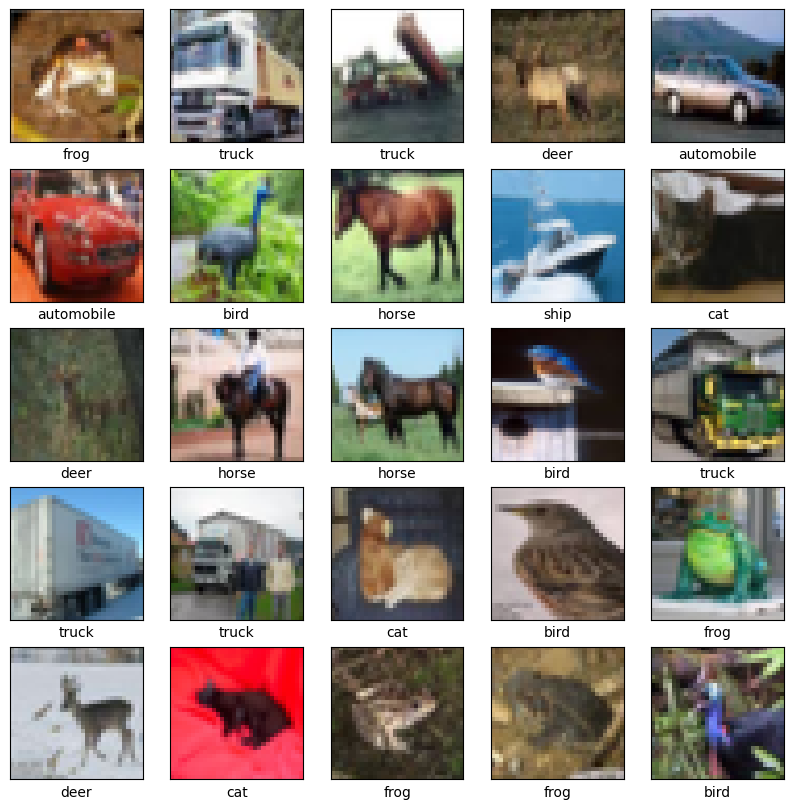

In [ ]:
#Verify the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Visualize our data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##Build a neural network using CNN
####We choose to build our neural network using CNN because it is often the best option for image classification, due to its Hierarchical Feature Learning ability that allows it to recognize patterns in images.

In [ ]:
# Define the CNN model
model1 = models.Sequential()

#Build the neural network
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2))) #This reduces the spatial dimensions by half, retaining the most dominant features in each 2x2 region.
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(128, (3, 3), activation='relu')) #As the depth of the network increases, the number of filters is increased (32 → 64 → 128) to capture more complex and abstract features
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.4))

model1.add(Flatten()) #Converts the 2D feature maps into a 1D vector, which can be fed into fully connected (Dense) layers.
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5)) #A higher dropout rate is applied before the final dense layers to ensure the network generalizes well on unseen data.
model1.add(Dense(10, activation='softmax')) #This corresponds to the 10 classes in the CIFAR-10 dataset. Softmax Activation is used for the output layer to produce a probability distribution over the 10 classes

In [ ]:
# Display the model summary
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,066 (894.79 KB)

 Trainable params: 228,106 (891.04 KB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
#Compile model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train model
history = model1.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3267 - loss: 2.1241 - val_accuracy: 0.5216 - val_loss: 1.3415
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5034 - loss: 1.3745 - val_accuracy: 0.4517 - val_loss: 1.5505
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5588 - loss: 1.2309 - val_accuracy: 0.6508 - val_loss: 0.9873
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6006 - loss: 1.1344 - val_accuracy: 0.6436 - val_loss: 1.0223
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6246 - loss: 1.0655 - val_accuracy: 0.6711 - val_loss: 0.9415
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6394 - loss: 1.0176 - val_accuracy: 0.6975 - val_loss: 0.8600
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6606 - loss: 0.9745 - val_accuracy: 0.6758 - val_loss: 0.9355
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6690 - loss: 0.941

313/313 - 1s - 2ms/step - accuracy: 0.6789 - loss: 0.9247


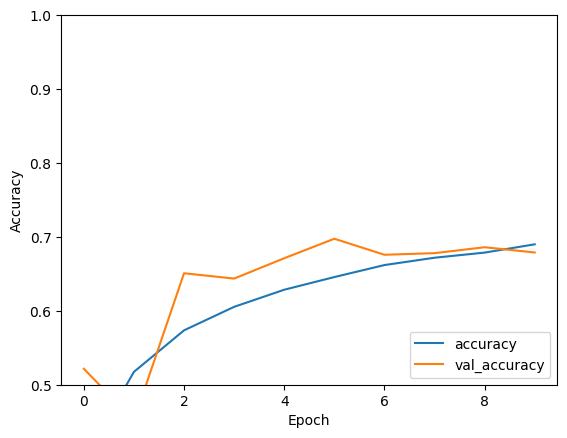

In [ ]:
#Evaluate model (Visualization)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6789000034332275


####We notice that the accuracy is low (0.6789) and the loss is preety high (0.9247), which means that the model makes big errors in most of the data.
####This may be due to an overfit, because we have a lot of parameters. With fewer parameters, the model is less likely to memorize the training data and more likely to generalize well to new, unseen data (like the validation set).

####Lets build a model again with fewer parameters, to see if it performs better.

In [ ]:
# Define the new CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # The simplified model uses fewer neurons (64 instead of 256), which means it’s making decisions based on a less complex feature set.
model.add(layers.Dense(10))

##Train and Test the new model

In [ ]:
# Display the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3448 - loss: 1.7697 - val_accuracy: 0.5418 - val_loss: 1.2586
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5633 - loss: 1.2207 - val_accuracy: 0.5980 - val_loss: 1.1262
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6306 - loss: 1.0482 - val_accuracy: 0.6433 - val_loss: 1.0121
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6650 - loss: 0.9521 - val_accuracy: 0.6557 - val_loss: 0.9787
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6920 - loss: 0.8715 - val_accuracy: 0.6699 - val_loss: 0.9558
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7135 - loss: 0.8090 - val_accuracy: 0.7006 - val_loss: 0.8857
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7363 - loss: 0.7426 - val_accuracy: 0.6922 - val_loss: 0.8971
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7509 - loss: 0.7082 -

313/313 - 1s - 2ms/step - accuracy: 0.7097 - loss: 0.8678


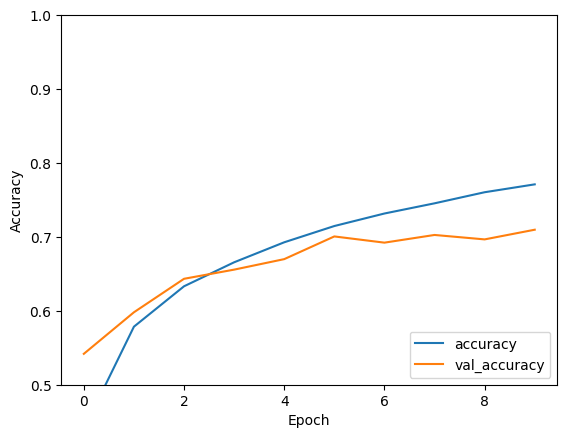

In [ ]:
#Evaluate model (Visualization)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7096999883651733


###We can see that in  our second try our model achieved a much better accuracy than the firt case. Lets Save and test our model and visualize its performance for ourselves

In [ ]:
#save the model
model.save('cifar100_sequencial_model.h5')

In [ ]:
# Load the saved model
loaded_model = load_model('cifar100_sequencial_model.h5')

##Display some images to visualize our model's performance

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predictions made successfully.


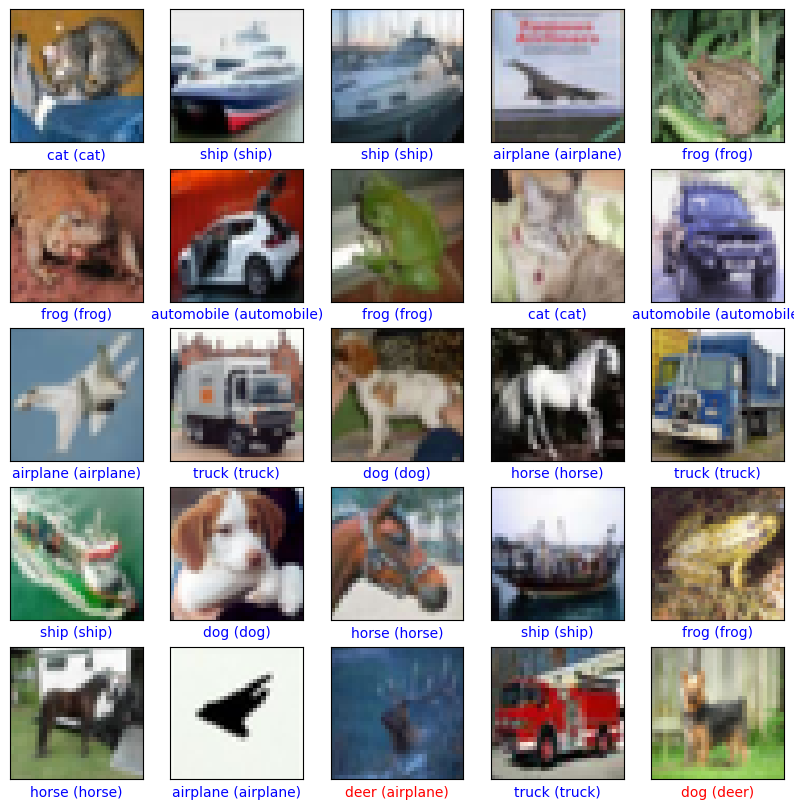

In [ ]:
# Function to display a grid of images
def display_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        # The CIFAR labels happen to be arrays, which is why we need the extra index
        if predictions is None:
            plt.xlabel(class_names[labels[i][0]])
        else:
            true_label = class_names[labels[i][0]]
            predicted_label = class_names[predictions[i]]
            color = 'blue' if true_label == predicted_label else 'red'
            plt.xlabel(f"{true_label} ({predicted_label})", color=color)
    plt.show()

# Load the trained model
# Change the path to our model file as needed
try:
    loaded_model = load_model('cifar100_sequencial_model.h5')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Select 25 images for the test
indices = np.arange(25)

# Extract the images and their labels from the dataset
test_images_sample = test_images[indices]
true_labels_sample = test_labels[indices]

# Predict the classes of the test images
try:
    predictions = loaded_model.predict(test_images_sample)
    predicted_labels = np.argmax(predictions, axis=1)
    print("Predictions made successfully.")
except Exception as e:
    print(f"Error making predictions: {e}")
    predicted_labels = None

# Display the images and their predictions
display_images(test_images_sample, true_labels_sample, predicted_labels)

###Our model already seems to perform a lot better, with only 2/25 missclassifications. This makes sense as our model achieve an accuracy score of 0.7096999883651733.
#### CNNs are ussually the best option for image classification. However, lets try to build a neural network using other models like knn, to check if we can achieve an even better accuracy:

In [ ]:
#Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Step 1: Flatten the CIFAR-10 images from 32x32x3 to 3072 features
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Step 2: Reshape the labels
train_labels_flat = train_labels.ravel()
test_labels_flat = test_labels.ravel()

###Initialize and train the model

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_images_flat, train_labels_flat)

# Make predictions on the test set
knn_predictions = knn.predict(test_images_flat)

# Evaluate the model
knn_accuracy = accuracy_score(test_labels_flat, knn_predictions)

# Print the accuracy
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.3417


###Aa we can see the knn model achieved a much lower accuracy compared to both of cnn models.

#Conclusion:

####The second, simplified CNN architecture achieved the best accuracy like we suspected, because it was less prone to overfitting, had fewer parameters, and still maintained enough complexity to capture the essential features of the CIFAR-10 dataset. Sometimes, a less complex model can perform better due to its better generalization capability.